In [9]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   

import warnings
warnings.filterwarnings("ignore")   

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Import CSV file

df = pd.read_csv('Dataset of Diabetes .csv')

# Check the head
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [11]:
# Explore the file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [12]:
# Explore the file

df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [13]:
# Explore the file

df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [14]:
# Data Types

df.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [15]:
# Check for missing values, 
# drop null values if present

print('\nMissig values: ')
df.isnull().sum()


Missig values: 


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [16]:
# Drop unimportant cells

# Singular Column
df.drop('ID', inplace=True, axis=1) 

# Multiple Column
# df.drop(['ID', 'column 2'], inplace=True, axis=1) 

df.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [17]:
# Encode target if it's not numeric.

df['CLASS'] = df['CLASS'].map({'N':0, 'P':1, 'Y':2, 'Y ':2})

df.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [18]:
# Encode target if it's not numeric.

df['Gender'] = df['Gender'].map({'F':0, 'M':1})

df

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,34221,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,47975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,87656,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,34223,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,454317,1.0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2.0
996,876534,1.0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2.0
997,87654,1.0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2.0
998,24004,1.0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2.0


In [19]:
df = df.dropna(subset=['Gender'])

In [20]:
if 'AGE' in df.columns:
    df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

In [21]:
df = df.dropna()

In [22]:
print('CLEANED HEAD: ')
print(df.head())
print('SHAPE AFTER CLEANING: ', df.shape)

CLEANED HEAD: 
   No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
0      17975     0.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
1      34221     1.0   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0   
2      47975     0.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
3      87656     0.0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
4      34223     1.0   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0   

   CLASS  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
SHAPE AFTER CLEANING:  (998, 13)


### Preprocessing

Included a check for class distribution to diagnose potential imbalance.

In [23]:
# Check class distribution
print("Class distribution:")
print(df['CLASS'].value_counts(normalize=True))

Class distribution:
CLASS
2.0    0.844689
0.0    0.102204
1.0    0.053106
Name: proportion, dtype: float64


### Train Test Split

In [24]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

### Scale features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train/Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the SVM Model

In [ ]:
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
# Use an SVM with an rbf kernel and add class weighting to handle potential class imbalance (kernel='rbf', class_weight='balanced' in SVC).

svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

### Predictions and Evaluations

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

Classification Report:
               precision    recall  f1-score   support

  No Diabetes       0.83      0.90      0.86        21
Possible Risk       0.75      0.50      0.60         6
     Diabetes       0.97      0.97      0.97       173

     accuracy                           0.95       200
    macro avg       0.85      0.79      0.81       200
 weighted avg       0.95      0.95      0.95       200



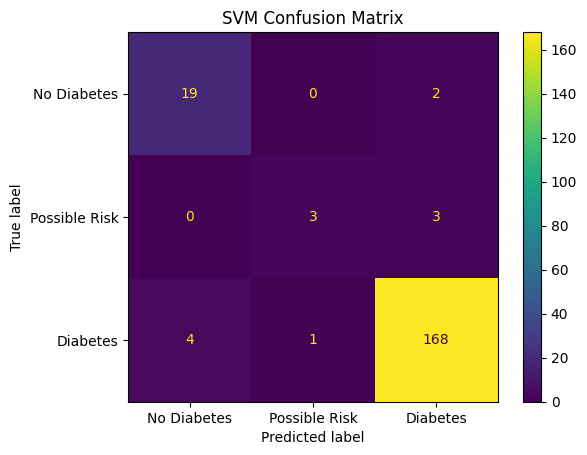

In [ ]:
y_pred = svm.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print('\n')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Possible Risk', 'Diabetes']))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Possible Risk', 'Diabetes'])
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()

### Model Serialization or Serving

Save the model and scaler

In [37]:
# NB: Make sure you install this
import joblib

joblib.dump(svm, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### To test your model

In [36]:
import joblib
import pandas as pd

# 1. Load saved model and scaler
svm = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

new_data = pd.DataFrame([
    [116, 74, 0, 0, 25.6, 0.201, 30, 23, 4, 12, 31, 4],
    [148, 72, 35, 0, 33.6, 0.627, 50, 4, 23, 31, 22, 3]
], columns=['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'])

# Preprocess (scaling)
new_data_scaled = scaler.transform(new_data)

# Predict
predictions = svm.predict(new_data_scaled)
print("Predictions:", predictions)

# Predict probabilities
probs = svm.predict_proba(new_data_scaled)
print("Probabilities:", probs)

Predictions: [1. 1.]
Probabilities: [[1.66666686e-14 9.99999900e-01 1.00000020e-07]
 [1.66666686e-14 9.99999900e-01 1.00000020e-07]]
